# Title: Final_Report

### Group members:
* Audrey Wang 41935289
* Sam Shan 85179604
* Dima Zubkovskii 61142865
* Michelle Sui 93853489

# Introduction

Diabetes is a chronic (long-lasting) health condition that affects how body turns food into energy. Body breaks down most of the food people eat into sugar (glucose) and releases it into the bloodstream. When the blood sugar goes up, it signals the pancreas to release insulin. Insulin acts like a key to let the blood sugar into the body’s cells for use as energy. However, with diabetes, patient's body doesn’t make enough insulin or can’t use it as well as it should. Moreover, gestational diabetes develops in pregnant women who have never had diabetes. If a patient have gestational diabetes, their baby could be at higher risk for health problems. Gestational diabetes usually goes away after your baby is born. However, it increases a patient's risk for type 2 diabetes later in life. (Center for Disease Control and Prevention, 2023) 

Early diagnosis and intervention can significantly alter the course of this disease, improving the quality of life for those affected. Recognizing the critical role of timely and accurate diagnostics, our project is inspired by a dataset sourced from the National Institute of Diabetes and Digestive and Kidney Diseases. This data provides a unique opportunity to utilize machine learning for predictive analysis in a medical context.
The dataset focuses on a specific subset of the population - women of Pima Indian heritage who are 21 years or older. It includes several medical predictor variables alongside one target variable, Outcome, indicating the presence or absence of diabetes. Our project aims to leverage the capabilities of artificial intelligence and data analytics to **develop a robust model that can predict the onset of diabetes in patients based on the diagnostic measurements provided in the dataset.** By doing so, we seek not only to contribute to the advancement of medical diagnostics but also to support preventive health measures among high-risk populations.



# Data Description:

For our research, we are using the data from Kaggle, which was originally collected by the National Institute of Diabetes and Digestive and Kidney Diseases.to predict if a patient from a group of 21 years and older women of Pima Indian heritage will have diabetes based on the next factors, which can be found as columns in the original comma separated valuetable:
* **Pregnancies**: the number of times pregnant
* **Glucose**:  plasma glucose concentration
* **BloodPressure**: diastolic blood pressure (in mmHg)
* **SkinThickness**: triceps skin fold thickness (mm) 
* **Insulin**: 2-hour serum insulin (in U/ml)
* **BMI**: body mass index (weight in kg/(height in m)^2)
* **DiabetesPedigreeFunction**: diabetes pedigree function 
* **Age**: age (in years)
* **Outcome**: 0 or 1 (0 means that a patient does not have diabetes, 1 means that a patient hass)


# Methods(unfinished):
According to our proposal, we have found out that missing data was prevalent in two factors: insulin and skin_sickness. We have concluded that these factors cannot play a predictor role in the final analysis. In every other factors, the amount of missing data was less than 1%. we have selected the following six quantitative variables as our predictors.
* **`Pregnancies`**: the number of times pregnant
* **`Glucose`**:  plasma glucose concentration
* **`BloodPressure`**: diastolic blood pressure (in mmHg)
* **`BMI`**: body mass index (weight in kg/(height in m)^2)
* **`DiabetesPedigreeFunction`**: diabetes pedigree function 
* **`Age`**: age (in years)

# Preliminary exploratory data analysis

## Read and import dataset from the web into R

In [2]:
### Run this cell before continuing.
library(tidyverse)
library(repr)
library(tidymodels)

Warning message:
“package ‘ggplot2’ was built under R version 4.3.2”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_co

In [3]:
URL <- "https://raw.githubusercontent.com/audrey-rw5683/dsci-100-2023w2-group-002-2/main/diabetes.csv"
diabetes_data <- read_csv(URL)
head(diabetes_data)

Rows: 768 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (9): Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, D...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1
5,116,74,0,0,25.6,0.201,30,0


## Clean and wrangle the data into a tidy format

### Set seed value

In [4]:
set.seed(123) #do not change the value.

In [5]:
# rename colunms to lowercase
diabetes <- rename(diabetes_data,
                 pregnancies =  Pregnancies,
                 glucose = Glucose,
                 blood_pressure = BloodPressure,
                 skin_sickness = SkinThickness,
                 insulin = Insulin,
                 bmi = BMI,
                 diabetes_pedigree_function = DiabetesPedigreeFunction,
                 age = Age,
                 outcome = Outcome)
# we will be working with outcome as a categorical variable, we will convert it to a factor using the function as_factor.
diabetes <- diabetes |>
    mutate(outcome = as_factor(outcome))

head(diabetes)

pregnancies,glucose,blood_pressure,skin_sickness,insulin,bmi,diabetes_pedigree_function,age,outcome
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1
5,116,74,0,0,25.6,0.201,30,0


### Split the data
* We will use 80% of the data for training and 20% for testing.

In [6]:
diabetes_split <- initial_split(diabetes, prop = 0.8, strata = outcome)  
diabetes_train <- training(diabetes_split)   
diabetes_test <- testing(diabetes_split)
glimpse(diabetes_train)
glimpse(diabetes_test)

Rows: 614
Columns: 9
$ pregnancies                <dbl> 1, 5, 10, 4, 10, 1, 3, 8, 1, 13, 5, 5, 3, 1…
$ glucose                    <dbl> 89, 116, 115, 110, 139, 103, 126, 99, 97, 1…
$ blood_pressure             <dbl> 66, 74, 0, 92, 80, 30, 88, 84, 66, 82, 92, …
$ skin_sickness              <dbl> 23, 0, 0, 0, 0, 38, 41, 0, 15, 19, 0, 26, 1…
$ insulin                    <dbl> 94, 0, 0, 0, 0, 83, 235, 0, 140, 110, 0, 0,…
$ bmi                        <dbl> 28.1, 25.6, 35.3, 37.6, 27.1, 43.3, 39.3, 3…
$ diabetes_pedigree_function <dbl> 0.167, 0.201, 0.134, 0.191, 1.441, 0.183, 0…
$ age                        <dbl> 21, 30, 29, 30, 57, 33, 27, 50, 22, 57, 38,…
$ outcome                    <fct> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
Rows: 154
Columns: 9
$ pregnancies                <dbl> 1, 0, 0, 11, 7, 6, 4, 3, 5, 8, 7, 5, 0, 2, …
$ glucose                    <dbl> 85, 137, 118, 143, 147, 92, 103, 180, 88, 1…
$ blood_pressure             <dbl> 66, 40, 84, 94, 76, 92, 60, 64, 66, 90, 68,

### Summarize the dataset

In [8]:
#the number of observations in each class
num_obs <- nrow(diabetes_train)
diabetes_outcomes <- diabetes_train |>
                    group_by(outcome) |>
                    summarize(count = n(), percentage = n() / num_obs * 100)

diabetes_outcomes

outcome,count,percentage
<fct>,<int>,<dbl>
0,400,65.14658
1,214,34.85342


In our training set, we have 400 observations with `outcome = 0`, and 214 observations with `outcome = 1`. The number of patients without diabetes is greater than the number of patients with diabetes which causes a class imbalance, which could potentially impact the predictions of our model. We plan to incorporate oversampling method into the recipe creation process to address this issue.

In [18]:
# the means of the variables
diabetes_stat <- diabetes_train |>
    summarize(across(pregnancies:age, mean))
diabetes_stat

pregnancies,glucose,blood_pressure,skin_sickness,insulin,bmi,diabetes_pedigree_function,age
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3.80456,121.0896,68.80945,20.47883,79.73616,32.06547,0.4683322,33.27362


In [23]:
# the number of observations have missing values
# pregnancies can be 0
# 0 represents missing values for other numerical variables
diabetes_missing <- diabetes_train |>
    filter(glucose == 0 | blood_pressure == 0 | skin_sickness == 0 | insulin == 0 | bmi == 0 | diabetes_pedigree_function == 0 | age == 0)
head(diabetes_missing)
diabetes_missing_num <- diabetes_missing |>
  summarize(missing_count_total = n())
diabetes_missing_num
zero_counts <- diabetes_train |>
  summarize(across(pregnancies:age, ~ sum(. == 0))) |> pivot_longer(cols = glucose:age, names_to = "variable", values_to = "count_missing")
zero_counts

pregnancies,glucose,blood_pressure,skin_sickness,insulin,bmi,diabetes_pedigree_function,age,outcome
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
5,116,74,0,0,25.6,0.201,30,0
10,115,0,0,0,35.3,0.134,29,0
4,110,92,0,0,37.6,0.191,30,0
10,139,80,0,0,27.1,1.441,57,0
8,99,84,0,0,35.4,0.388,50,0
5,117,92,0,0,34.1,0.337,38,0


missing_count_total
<int>
300


pregnancies,variable,count_missing
<int>,<chr>,<int>
90,glucose,4
90,blood_pressure,31
90,skin_sickness,181
90,insulin,298
90,bmi,9
90,diabetes_pedigree_function,0
90,age,0


We have 300 records with missing values, among which 298 contain missing values for `insulin` and 181 for `skin_sickness`. Due to the high number of missing values in these two variables, we do not currently intend to use them as predictors. For the rest of the missing values, since they involve a small amount of data, we'll exclude those rows during model training.

### Visualize the dataset

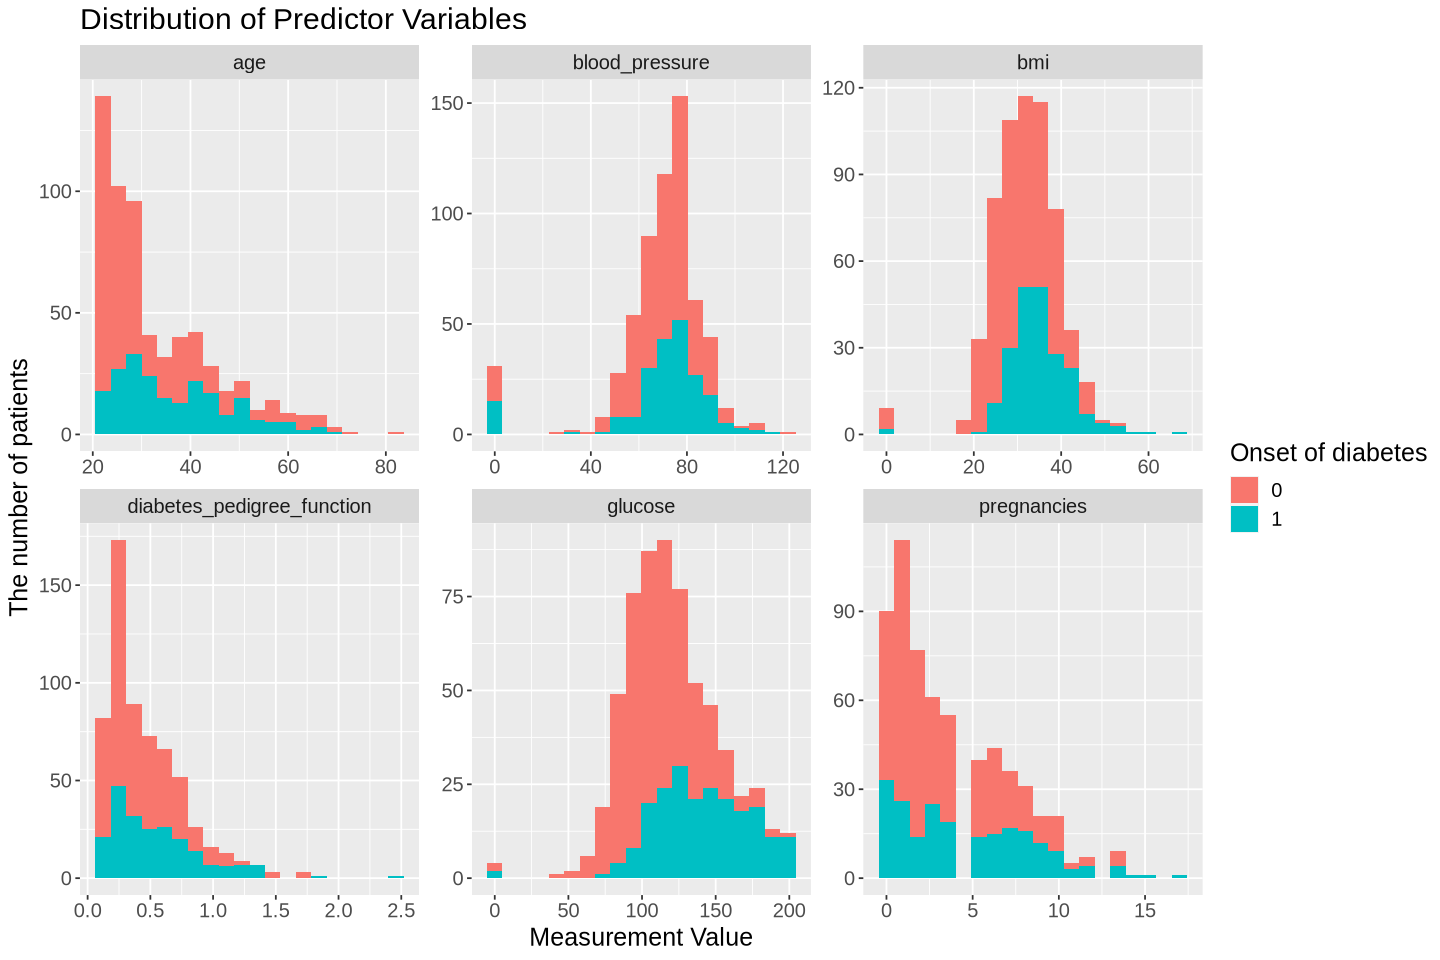

In [11]:
options(repr.plot.width = 12, repr.plot.height = 8)
# plot the distribution of each of the variables
distri <- diabetes_train |>
  select(pregnancies, glucose, blood_pressure, bmi, diabetes_pedigree_function, age, outcome)|>
  pivot_longer(cols = pregnancies:age) |>
  ggplot(aes(x = value, fill = outcome)) +
  geom_histogram(bins = 20) +
  facet_wrap(~ name, scales = "free") +
  labs(title = "Distribution of Predictor Variables", y = "The number of patients", x = "Measurement Value", fill = "Onset of diabetes") +
  theme(text = element_text(size = 15))
distri

# Expected outcomes and significance
### What do you expect to find?
We would likely expect to find correlations between the medical predictor variables (such as glucose level, blood pressure, insulin level, BMI, etc.) and the target variable of our dataset, Outcome. We will use classification and this model will be trained on the medical predictor variables to predict the presence or absence of diabetes (Outcome variable) using 1 or 0. 
### What impact could such findings have?
The most applicable findings are for early detection and intervention of diabetes in patients by accurately predicting the onset of the condition, delaying and potentially preventing the development of diabetes related complications such as cardiovascular disease and kidney diseases. This could also lower the cost of healthcare as the need for expensive treatment will lessen with an accurate classification model, and the insight gained from this analysis can overall lead to more informed healthcare policies and planning.
### What future questions could this lead to?
* How do other lifestyle choices such as diet, physical activity, and environmental factors interact with our medical predictor variables to influence diabetes risk? 
* What are the underlying social, economic, and cultural determinants of health disparities observed in diabetes prevalence among Pima Indian women and other populations?
* How can predictive models for diabetes be integrated into routine clinical practice and health systems?
* Are there other components, beyond those included in the current dataset, that can enhance the accuracy of predictive models for diabetes onset?
* What lessons can be learned from the experiences of the Pima Indian population when we address diabetes risks that are applicable to other indigenous communities and marginalized populations?

# Classification and Results

We will answer our question by creating a classifaction model based on pregnancies, glucose, blood pressure,	skin sickness, insulin,	bmi and diabetes pedigree function

First, we need to decide which k value yields the best accuracy. To do this we will perform a 5-fold cross validation with K values ranging from 1 to 25. We chose ranges from 1- 25 since we believe it is a wide enoguh range to find a good K value and chose to use 5 folds since it is enough accuraccy for out project.

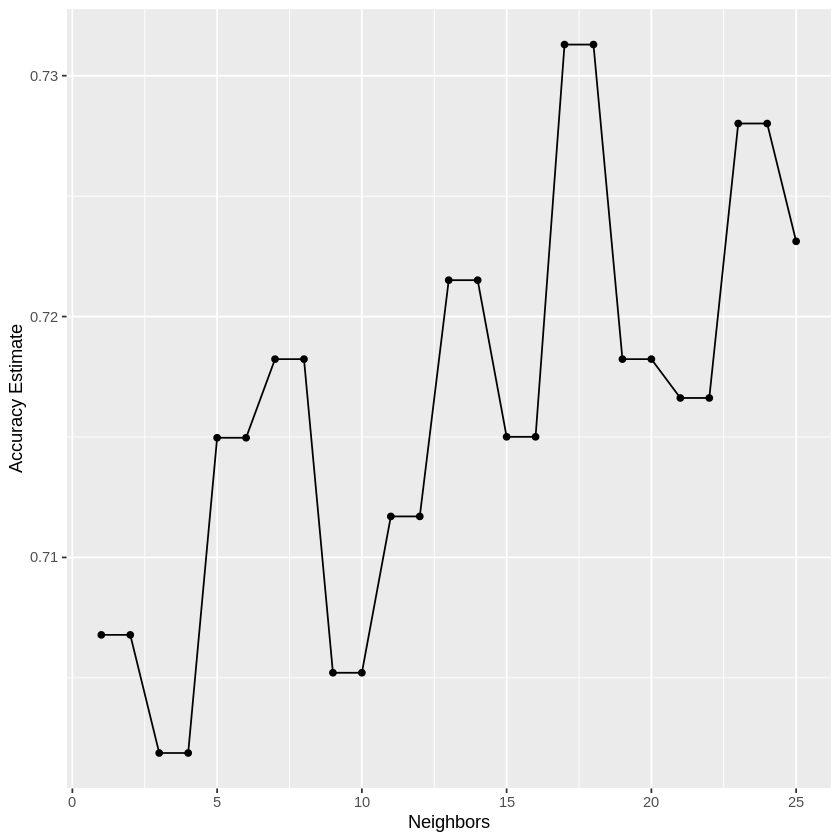

In [19]:
#set the seed
set.seed(2024)

# create 5 fold cross validation
diabetes_mnist_vfold <- vfold_cv(diabetes_train, v = 5, strata = outcome)

# create the KNN spec to determine most accurate K value
diabetes_knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
            set_engine("kknn") |>
            set_mode("classification")

# create recipe using all values as predictors
diabetes_mnist_recipe <- recipe(outcome ~., data = diabetes_train)


# get the results of the prediction where K is between 1 and 25
diabetes_knn_results <- workflow() |>
                 add_recipe(diabetes_mnist_recipe) |>
                 add_model(diabetes_knn_spec) |>  
                 tune_grid(resamples = diabetes_mnist_vfold, grid = tibble(neighbors = seq(1, 25))) |>
                 collect_metrics() |>
                 filter(.metric == 'accuracy')

# plot the results/accuracies of the K values
diabetes_cross_val_plot <- ggplot(diabetes_knn_results, aes(x = neighbors, y = mean)) +
                  geom_point() +
                  geom_line() +
                  labs(x = 'Neighbors', y = 'Accuracy Estimate') 

diabetes_cross_val_plot

From the graph we can see that k = 17/18 gets the best accuracy, so we will use k = 17 to train our classification model

# Bibliography  * Center for Disease Control and Prevention (2023). CDC
  https://www.cdc.gov/diabetes/basics/diabetes.html#:~:text=Diabetes%20is%20a%20chronic%20
* Pima Indians Diabetes Database (n.d.). Kaggle
  https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database?select=diabetes.csv
* The creators of the Pima Indians Diabetes database:
  Smith, J.W., Everhart, J.E., Dickson, W.C., Knowler, W.C., & Johannes, R.S. (1988). Using the ADAP learning algorithm to forecast the onset of diabetes mellitus. In Proceedings of the Symposium on Computer Applications and Medical Care (pp. 261--265). IEEE Computer Society Press.Press. 
